In [21]:
import pandas as pd
import matplotlib as plt
import urllib
%matplotlib inline
plt.style.use('ggplot')

In [22]:
# Load 311 complaints
three11 = pd.read_csv('C:/Data/AnalyzeBoston/data/311.csv', dtype=object)

In [23]:
# Convert date/time columns to datetime
three11['open_dt'] = pd.to_datetime(three11['open_dt'], errors='coerce')
three11['target_dt'] = pd.to_datetime(three11['open_dt'], errors='coerce')
three11['closed_dt'] = pd.to_datetime(three11['open_dt'], errors='coerce')

#### Create subset of complaints related to garbage

In [24]:
garbagetypes = ['Overflowing or Un-kept Dumpster',
                'Improper Storage of Trash (Barrels)',
                'Missed Trash/Recycling/Yard Waste/Bulk Item',
                'Trash on Vacant Lot',
                'Illegal Dumping']

In [25]:
garbage = three11[three11.TYPE.isin(garbagetypes)]

In [26]:
garbage.to_csv('C:/Data/AnalyzeBoston/data/311_garbage.csv', index=False)

#### Create subset of garbage-related complaints from move-in week (Aug. 29-Sept. 4)

In [27]:
garbage2016 = garbage[garbage['open_dt'].dt.year == 2016]

In [28]:
moveinweek = garbage2016[(garbage2016['open_dt'] >= pd.datetime(2016, 8, 29)) &
                (garbage2016['open_dt'] < pd.datetime(2016, 9, 5))]

In [29]:
moveinweek.to_csv('C:/Data/AnalyzeBoston/data/311_garbage_moveinweek_2016.csv', index=False)

#### Plot garbage complaints by week for the year 2016

In [30]:
garbage2016 = garbage2016.set_index('open_dt')

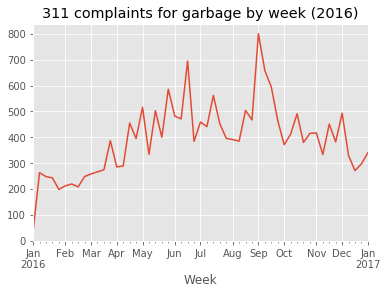

In [31]:
ax = garbage2016.resample('W').size().plot(title="311 complaints for garbage by week (2016)")
ax.set_xlabel('Week')

#### Download photos of garbage submitted with 311 complaints during moving week

In [36]:
moveinweek = pd.read_csv('C:/Data/AnalyzeBoston/data/311_garbage_moveinweek_2016.csv')

In [37]:
picture = urllib.URLopener()

In [38]:
picturelist = []

In [39]:
for index, row in moveinweek.iterrows():
    url = str(row['SubmittedPhoto'])
    filename = str(row['CASE_ENQUIRY_ID'])
    picturelist.append([url, filename])

In [43]:
for item in picturelist:
    if item[0] != "nan":
        url = item[0]
        filename = "C:/Data/AnalyzeBoston/photos/%s.jpg" % item[1]
        picture.retrieve(url, filename)